In [1]:
'''Kendime Notlar'''

'''Burada önce her bir veri setini incelemek içindeki
* Null valuelar
* Yanlış değerler
* Anlamsız değerler

Bunlar önceden her bir veri seti için yapılıp sonrasında ana tek bir set üzerinde birleştirildiğinde sıkıntı olmayacaktır. Lakin her halükarda bunu tekrardan kontrol etmek lazım.




!+!'^! E-CORP Yaşları maksimum 72 ay olarak gözüküyor. Bunlar müşteri süresi olarak yaşmı yoksa gerçek yaşları mı öğren
!+!'^!


The CSAT Survey and Product Bug datasets each involve 640 customers, and notably, they share the same set of IDs (every customer who gave a CSAT survey also has product bug records, which suggests these might be specific clients in a program).



Csat ile help ticket analizi first response time and csat

'''

"Burada önce her bir veri setini incelemek içindeki\n* Null valuelar\n* Yanlış değerler\n* Anlamsız değerler\n\nBunlar önceden her bir veri seti için yapılıp sonrasında ana tek bir set üzerinde birleştirildiğinde sıkıntı olmayacaktır. Lakin her halükarda bunu tekrardan kontrol etmek lazım.\n\n\n\n\n!+!'^! E-CORP Yaşları maksimum 72 ay olarak gözüküyor. Bunlar müşteri süresi olarak yaşmı yoksa gerçek yaşları mı öğren\n!+!'^!\n\n\nThe CSAT Survey and Product Bug datasets each involve 640 customers, and notably, they share the same set of IDs (every customer who gave a CSAT survey also has product bug records, which suggests these might be specific clients in a program).\n\n"

In [2]:
# Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


MRR: Müşterinin E-corp’a aylık olarak ödediği para miktarını gösterir.


Total Revenue: Müşterinin, E-corp ürünlerini kullanarak elde ettiği toplam gelir miktarını gösterir.


Help Ticket Count: Müşterinin, müşteri destek ekibinden yardım almak için oluşturduğu toplam talep sayısını gösterir.


Help Ticket Lead Time(hours): İlgili müşteri tarafından oluşturulan taleplerin ortalama çözüm süresini gösterir.


Company Newsletter Interaction Count: Müşterinin, E-corp tarafından gönderilen bültenlerle kaç kez etkileşime geçtiğini gösterir.


Status: Müşterinin satış sürecindeki mevcut durumunu gösterir.

--------------------------------------

# Analyses on Each Dataset Separately

### Csat Survey

In [3]:
# CSAT_Survey
csat_survey_data_df = pd.read_csv("data/CSAT_Survey_Data.csv")

csat_survey_data_df.head()

,Customer ID,Year,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel
0,CRM-1516050,2022,3,2022-07-01,2022-08-26,10,5,Once a Month,5,5.0,I need someone from Insider team to provide me...
1,CRM-1516050,2022,3,2022-07-01,2022-09-27,10,5,Once a Month,5,5.0,I don't use it often
2,CRM-1470950,2022,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...
3,CRM-1470950,2022,3,2022-07-01,2022-09-30,6,3,Once a Week,4,4.0,I tried but could not find everything I need
4,CRM-1470950,2022,2,2022-04-01,2022-06-23,10,5,Once a Day,4,3.0,I need someone from Insider team to provide me...


Burada Csat Survey columnlarını açıkla

### Customer Age

In [4]:
# Customer_Age
customer_age_df = pd.read_csv("data/Customer_Age_Data.csv")

customer_age_df.head()

,CRM ID,Customer Age (Months)
0,CRM-1471650,24
1,CRM-1516050,13
2,CRM-1087300,25
3,CRM-1467150,12
4,CRM-230550,12


In [5]:
print("Customer Age Shape:")
print(customer_age_df.shape)

Customer Age Shape:
(2651, 2)


In [6]:
print("Customer Age Data Types: ")
print(customer_age_df.dtypes)

Customer Age Data Types: 
CRM ID                   object
Customer Age (Months)     int64
dtype: object


In [7]:
print("Missing Values for Customer Age Data:")
print(customer_age_df.isnull().sum())

Missing Values for Customer Age Data:
CRM ID                   0
Customer Age (Months)    0
dtype: int64


In [8]:
print("Number of duplicate rows:")
print(customer_age_df.duplicated().sum())


Number of duplicate rows:
0


In [9]:
print(f"Summary Statistics for Customer Age Data:")
print(customer_age_df.describe())

Summary Statistics for Customer Age Data:
       Customer Age (Months)
count            2651.000000
mean               20.077707
std                16.427542
min                 1.000000
25%                 7.000000
50%                15.000000
75%                27.000000
max                72.000000


In [10]:
retention_6m = 100 * (customer_age_df['Customer Age (Months)'] >= 6).sum() / len(customer_age_df)
retention_12m = 100 * (customer_age_df['Customer Age (Months)'] >= 12).sum() / len(customer_age_df)
retention_24m = 100 * (customer_age_df['Customer Age (Months)'] >= 24).sum() / len(customer_age_df)

print("Customer Retention Metrics:")
print(f"6-month retention rate: {retention_6m:.2f}%")
print(f"12-month retention rate: {retention_12m:.2f}%")
print(f"24-month retention rate: {retention_24m:.2f}%")

Customer Retention Metrics:
6-month retention rate: 82.35%
12-month retention rate: 63.79%
24-month retention rate: 33.16%


In [11]:
num_customers_above_27 = customer_age_df[customer_age_df["Customer Age (Months)"] > 27].shape[0]
print("Number of customers older than 27 months:", num_customers_above_27)


Number of customers older than 27 months: 660


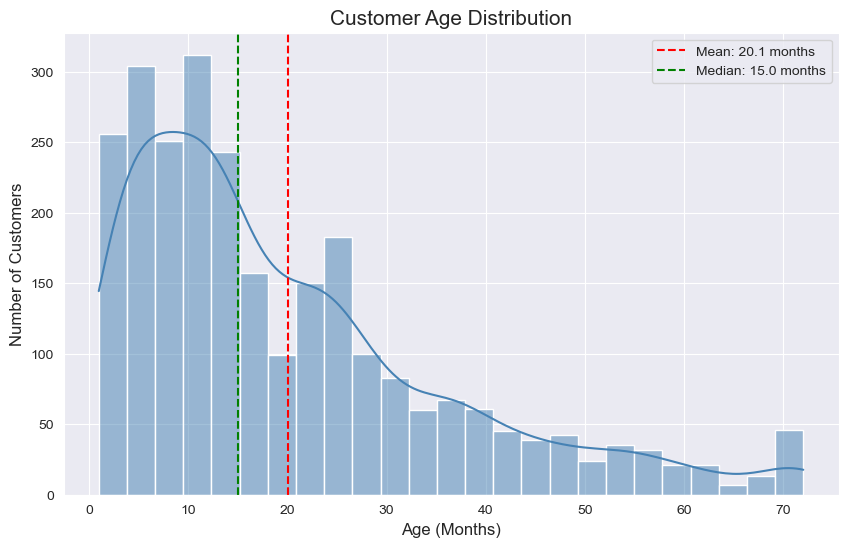

In [12]:
plt.figure(figsize=(10, 6))

sns.histplot(data=customer_age_df, x='Customer Age (Months)', kde=True, color='steelblue')
plt.axvline(customer_age_df['Customer Age (Months)'].mean(), color='red', linestyle='--',
            label=f'Mean: {customer_age_df["Customer Age (Months)"].mean():.1f} months')
plt.axvline(customer_age_df['Customer Age (Months)'].median(), color='green', linestyle='--',
            label=f'Median: {customer_age_df["Customer Age (Months)"].median():.1f} months')

plt.title('Customer Age Distribution', fontsize=15)
plt.xlabel('Age (Months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend()
plt.show()

From these outputs;

* There are total **2651** customers.
* There is **widely spread** in Customer Age from 1 month customers to 72 months customers with standard deviation of 16.4.
* According to **percentiles** and Graphs; Customer Age distribution is **Positively (Right) Skewed**.



* About 75% of customers have been with the company for 27 months or less, This means most of the users are new.
* 6-month retention rate of 82.35%, but it drops to 63.79% at 12 months and further falls to 33.16% at 24 months. This rapid decrease between 12-24 months shows that many customers leave before they hit the two-year mark.
* Could be focused on **mid-long term** to customers to reduce loss, and increase tenured customers.
* By examining the nature of long-term customer interactions, we can gain insights and develop strategies that can extended user engagement. Such insights can then be used to cultivate a loyal customer base over time.

### Customer MRR

In [13]:
# Customer MRR
customer_mrr_df = pd.read_csv("data/Customer_MRR_Data.csv")

customer_mrr_df.head()

,Customer ID,MRR
0,CRM-5454800,"$8,212"
1,CRM-5479950,"$2,026"
2,CRM-5494800,"$2,100"
3,CRM-5598450,"$2,900"
4,CRM-5602550,"$1,898"


In [14]:
print(customer_mrr_df.shape)

(1380, 2)


* It appears that some of the customers' MRR data is missing, possibly due to their customer type or current usage within the company, resulting in the absence of valid data at this time.

In [15]:
print("MRR Data Types: ")
print(customer_mrr_df.dtypes)

MRR Data Types: 
Customer ID    object
MRR            object
dtype: object


Since MRR is currently represented as an object with the currency symbol *'$'*, it should be converted to an integer value for proper analysis.

In [34]:
# Convert MRR to integer
customer_mrr_df['MRR'] = customer_mrr_df['MRR'].replace({r'\$': '', r',': ''}, regex=True).astype(np.int64)

In [35]:
print(customer_mrr_df.dtypes)
customer_mrr_df.head()

Customer ID    object
MRR             int64
dtype: object


,Customer ID,MRR
0,CRM-5454800,8212
1,CRM-5479950,2026
2,CRM-5494800,2100
3,CRM-5598450,2900
4,CRM-5602550,1898


In [36]:
print("Missing Values for Customer MRR Data:")
print(customer_mrr_df.isnull().sum())

Missing Values for Customer MRR Data:
Customer ID    0
MRR            0
dtype: int64


In [37]:
print("Number of duplicate rows:")
print(customer_age_df.duplicated().sum())

Number of duplicate rows:
0


In [38]:
print(f"Summary Statistics for Customer MRR Data:")
print(customer_mrr_df.describe())

Summary Statistics for Customer MRR Data:
                MRR
count   1380.000000
mean    3933.708696
std     5279.234169
min       26.000000
25%     1152.250000
50%     2424.000000
75%     4680.250000
max    62732.000000


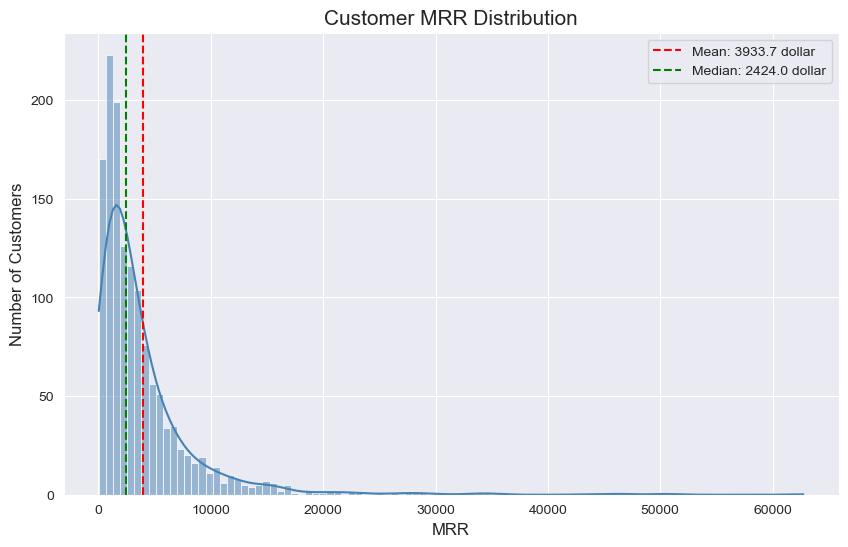

In [21]:
plt.figure(figsize=(10, 6))

sns.histplot(data=customer_mrr_df, x='MRR', kde=True, color='steelblue')
plt.axvline(customer_mrr_df['MRR'].mean(), color='red', linestyle='--',
            label=f'Mean: {customer_mrr_df["MRR"].mean():.1f} dollar')
plt.axvline(customer_mrr_df['MRR'].median(), color='green', linestyle='--',
            label=f'Median: {customer_mrr_df["MRR"].median():.1f} dollar')

plt.title('Customer MRR Distribution', fontsize=15)
plt.xlabel('MRR', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend()
plt.show()

From these we obtain these results;

* The histograms show **Strong Positive (Right) Skew** with many customers fall behind the MMR value of $ 5000 dollars (75%)


* Customers shows high volatile spending on E-Corp with standard deviation of **$ 5300**.

### Customer Revenue

In [119]:
# Customer Revenue

customer_revenue = pd.read_csv("data/Customer_Revenue_Data.csv")

customer_revenue

,Customer ID,Total Revenue
0,CRM-1470950,"$732,199"
1,CRM-1526100,$0
2,CRM-1506400,"$375,135"
3,CRM-1430550,$0
4,CRM-1485600,"$116,732"
...,...,...
896,CRM-783450,"$16,527"
897,CRM-1500500,$0
898,CRM-155450,"$567,026"
899,CRM-1499600,"$15,967,518"


In [120]:
print(customer_revenue.shape)

(901, 2)


* The **901** customers shows there is much less information than MRR

In [121]:
print("Customer Revenue Types: ")
print(customer_revenue.dtypes)

Customer Revenue Types: 
Customer ID      object
Total Revenue    object
dtype: object


In [124]:

customer_revenue['Total Revenue'] = customer_revenue['Total Revenue'].replace({r'\$': '', r',': ''}, regex=True).astype(np.int64)

In [125]:
print("Customer Revenue Types: ")
print(customer_revenue.dtypes)

Customer Revenue Types: 
Customer ID      object
Total Revenue     int64
dtype: object


In [126]:
customer_revenue

,Customer ID,Total Revenue
0,CRM-1470950,732199
1,CRM-1526100,0
2,CRM-1506400,375135
3,CRM-1430550,0
4,CRM-1485600,116732
...,...,...
896,CRM-783450,16527
897,CRM-1500500,0
898,CRM-155450,567026
899,CRM-1499600,15967518


In [127]:
print("Missing Values for Customer Revenue Data:")
print(customer_revenue.isnull().sum())

Missing Values for Customer Revenue Data:
Customer ID      0
Total Revenue    0
dtype: int64


In [128]:
print("Number of duplicate rows:")
print(customer_revenue.duplicated().sum())

Number of duplicate rows:
0


In [129]:
print(f"Summary Statistics for Customer Revenue Data:")
print(customer_revenue.describe())

Summary Statistics for Customer Revenue Data:
       Total Revenue
count   9.010000e+02
mean    1.259107e+07
std     1.218891e+08
min     0.000000e+00
25%     5.790000e+02
50%     6.074100e+04
75%     4.542900e+05
max     2.789805e+09


In [109]:
# Calculate the first and third quartiles
Q1 = customer_revenue['Total Revenue'].quantile(0.25)
Q3 = customer_revenue['Total Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to get outliers
outliers = customer_revenue[customer_revenue['Total Revenue'] > upper_bound]

# Display the outliers
print(outliers)


     Customer ID  Total Revenue
5    CRM-1548450        3128751
19    CRM-150500      175293442
26   CRM-1464800        2227584
37   CRM-1501100       27956189
38   CRM-1559050        1812341
..           ...            ...
871   CRM-626250        3451604
873   CRM-617450       30414659
874   CRM-608250        1802794
879  CRM-1492950       45226966
899  CRM-1499600       15967518

[143 rows x 2 columns]


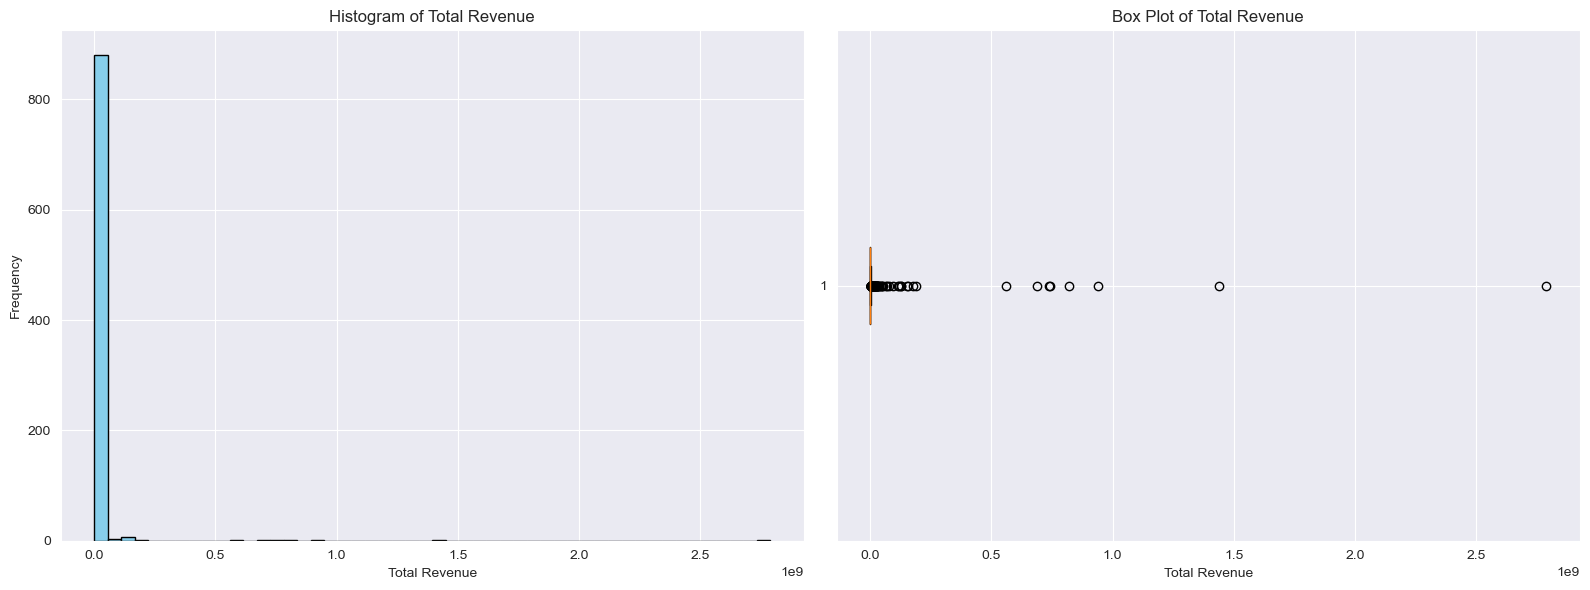

In [110]:
import matplotlib.pyplot as plt

# Assuming customer_revenue DataFrame is already loaded and cleaned.

# Create a figure with two subplots: one for histogram and one for box plot.
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram plot with outliers
axes[0].hist(customer_revenue['Total Revenue'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Total Revenue')
axes[0].set_xlabel('Total Revenue')
axes[0].set_ylabel('Frequency')
# Optionally, use a log scale if the distribution is highly skewed
# axes[0].set_xscale('log')

# Box plot for Total Revenue
axes[1].boxplot(customer_revenue['Total Revenue'], vert=False)
axes[1].set_title('Box Plot of Total Revenue')
axes[1].set_xlabel('Total Revenue')

plt.tight_layout()
plt.show()


### Help Ticket

In [131]:
# Help ticket

help_ticket = pd.read_csv("data/Help_Ticket_Data.csv")

help_ticket.head()

,Customer ID,Help Ticket Count,Help Ticket Lead Time (hours)
0,CRM-1516050,9,418
1,CRM-1467150,8,382
2,CRM-1470950,30,366
3,CRM-1526100,4,1206
4,CRM-1506400,22,484


In [132]:
print("Help Ticket Shape:")
print(help_ticket.shape)


Help Ticket Shape:
(1367, 3)


In [133]:
print("Helpt Ticket Data Types: ")
print(help_ticket.dtypes)

Helpt Ticket Data Types: 
Customer ID                      object
Help Ticket Count                 int64
Help Ticket Lead Time (hours)     int64
dtype: object


In [134]:
print("Missing Values for Help Ticket Data:")
print(help_ticket.isnull().sum())

Missing Values for Help Ticket Data:
Customer ID                      0
Help Ticket Count                0
Help Ticket Lead Time (hours)    0
dtype: int64


In [137]:
print("Number of duplicate rows:")
print(help_ticket.duplicated().sum())


Number of duplicate rows:
0


In [139]:
print(f"Summary Statistics for Help Ticket Data:")
print(help_ticket.describe())

Summary Statistics for Help Ticket Data:
       Help Ticket Count  Help Ticket Lead Time (hours)
count        1367.000000                    1367.000000
mean           17.397952                     786.302853
std            25.354291                     672.856978
min             1.000000                       0.000000
25%             3.000000                     387.500000
50%             9.000000                     603.000000
75%            22.000000                     976.000000
max           443.000000                   11632.000000


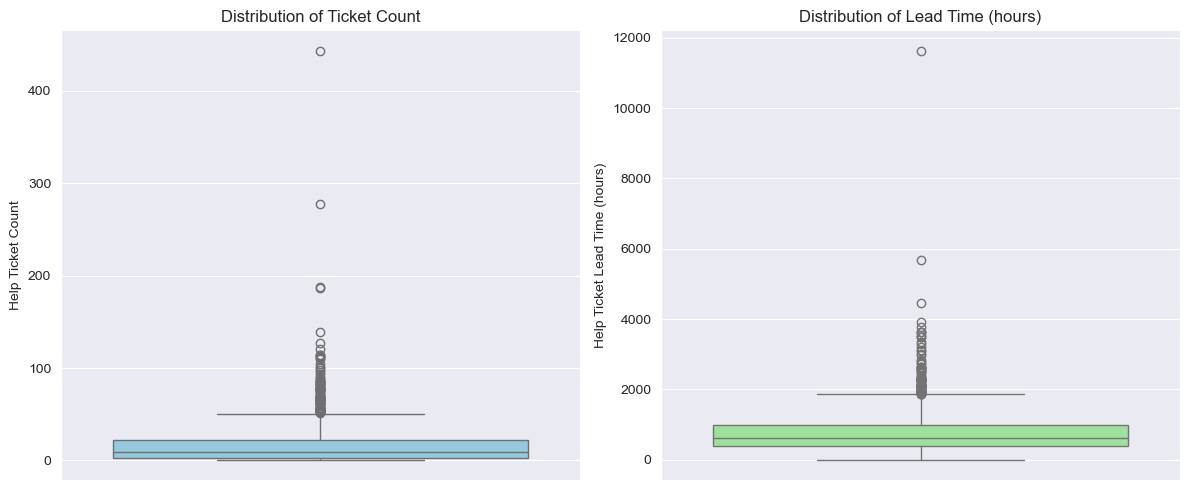

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ticket Count
sns.boxplot(data=help_ticket, y='Help Ticket Count', ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Ticket Count')

# Lead Time
sns.boxplot(data=help_ticket, y='Help Ticket Lead Time (hours)', ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Lead Time (hours)')

plt.tight_layout()
plt.show()

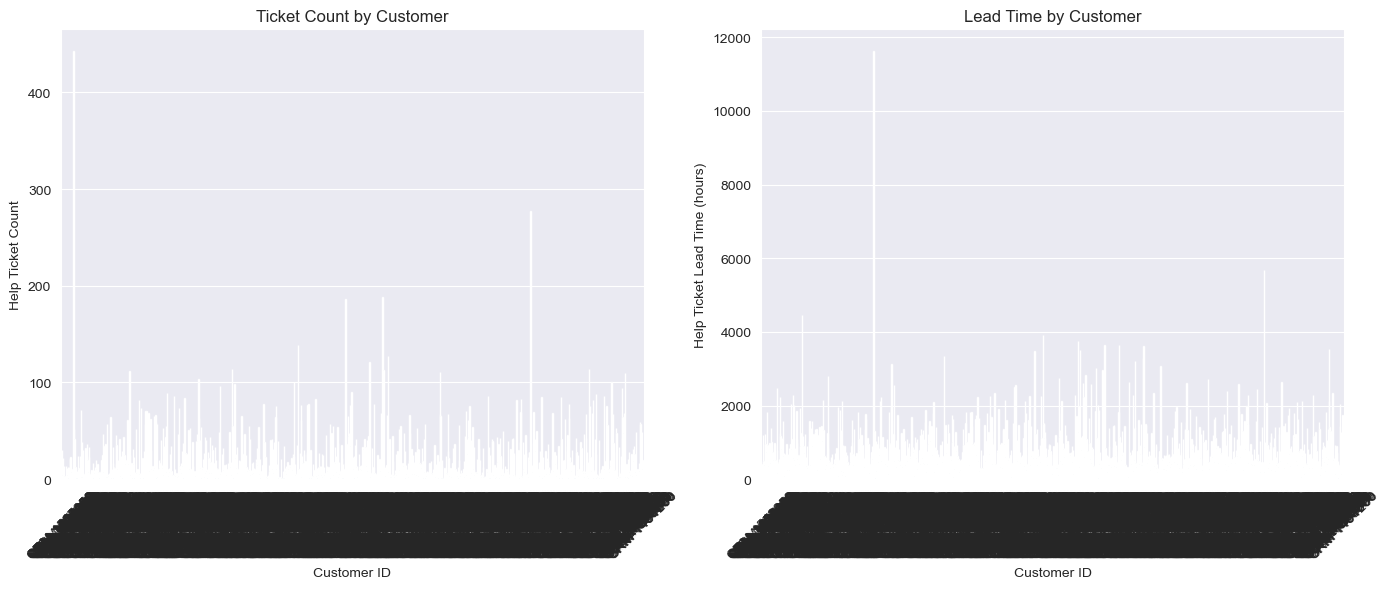

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Ticket Count by Customer
sns.barplot(data=help_ticket, x='Customer ID', y='Help Ticket Count', ax=axes[0])
axes[0].set_title('Ticket Count by Customer')
axes[0].tick_params(axis='x', rotation=45)

# Lead Time by Customer
sns.barplot(data=help_ticket, x='Customer ID', y='Help Ticket Lead Time (hours)', ax=axes[1])
axes[1].set_title('Lead Time by Customer')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Help ticket incelemesi

### Newsletter Interaction

In [13]:
# Newsletter Interaction

newsletter_df = pd.read_csv("data/Newsletter_Interaction_Data.csv")

newsletter_df.head()

,Customer ID,Company Newsletter Interaction Count
0,CRM-160150,54
1,CRM-166800,27
2,CRM-927200,24
3,CRM-1526050,23
4,CRM-1489600,20


Newsletter interaction incelenmesi

### Product Bug

In [14]:
# Product Bug Task

product_bug_task_df = pd.read_csv("data/Product_Bug_Task_Data.csv")

product_bug_task_df.head()

,Customer ID,Product Bug Task Count
0,CRM-1526150,179
1,CRM-1477300,150
2,CRM-1450300,66
3,CRM-661350,116
4,CRM-1435450,106


product_bug _task incelenmesi

### Region and Vertical

In [15]:
# Region and Vertical

region_and_vertical_df = pd.read_csv("data/RegionAndVertical_Data.csv")

region_and_vertical_df.head()

,Customer ID,Region,Vertical,Subvertical
0,CRM-1471650,Malaysia,Media and Publishing,Content Websites
1,CRM-1516050,Taiwan,Retail,Fashion Retailer
2,CRM-1087300,Australia,Transportation and Logistics,Transportation and Logistics
3,CRM-1467150,Taiwan,Retail,Marketplace
4,CRM-230550,Turkey,Retail,Fashion Retailer


Region and vertical incelemesi

### Status and Level

In [16]:
# Status and Level

status_and_level_df = pd.read_csv("data/StatusAndLevel_Data.csv")

status_and_level_df.head()

,Customer ID,Status,Customer Level
0,CRM-1471650,Onboarding,Enterprise
1,CRM-1516050,Onboarding,Long-tail
2,CRM-1087300,Churn,Semi-Enterprise
3,CRM-1467150,Churn,Semi-Enterprise
4,CRM-230550,Churn,Long-tail


### Bulunan sonuçlara göre genel bir çıkarım

* Verilen ayrı veri setleri üzerinde **Region and Vertical** , **Status** ve **Age** veri setleri **2651** Customer ile bizim için ana veri listesi ya da **Master List** olarak kabul edilecektir.

* Geri kalan veri setleri ana veri setlerimiz üzerinde küçük bir kümeye ait kişilerden oluşmaktadır. Revenue veri seti **900** Customer, Newsletter **251** gibi.